In [ ]:
import os
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN
from keras.preprocessing.sequence import TimeseriesGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('/content/monthly-milk-production-pounds.csv',index_col='Month',parse_dates=True)
data

,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
Month,
1962-01,589.0
1962-02,561.0
1962-03,640.0
1962-04,656.0
1962-05,727.0
...,...
1975-09,817.0
1975-10,827.0
1975-11,797.0


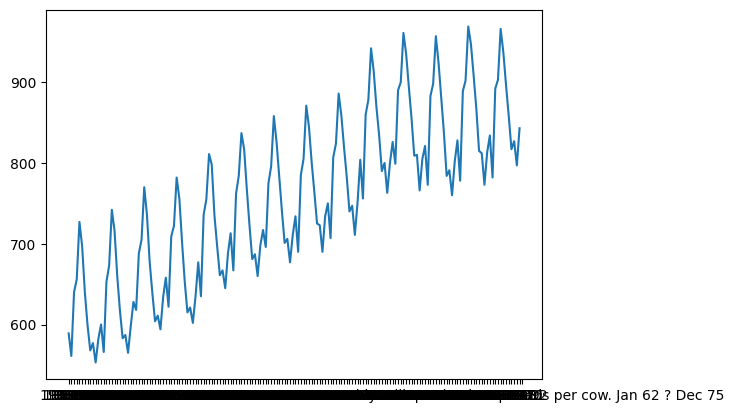

In [ ]:
plt.plot(data)

In [ ]:
traindata=data[:84]
testdata=data[84:]

In [ ]:
scalar=MinMaxScaler()
scaledtraindata=scalar.fit_transform(traindata)
scaledtestdata=scalar.fit_transform(testdata)

In [ ]:
n_inputs=12
n_features=1
generator=TimeseriesGenerator(scaledtraindata,scaledtraindata,length=12,batch_size=1)

In [ ]:
x,y=generator[0]
print(x.flatten(),y)

[0.11803279 0.02622951 0.2852459  0.33770492 0.5704918  0.47213115
 0.2852459  0.15081967 0.04918033 0.07868852 0.         0.09508197] [[0.15409836]]


In [ ]:
x,y=generator[1]
print(x.flatten(),y)

[0.02622951 0.2852459  0.33770492 0.5704918  0.47213115 0.2852459
 0.15081967 0.04918033 0.07868852 0.         0.09508197 0.15409836] [[0.04262295]]


In [ ]:
x,y=generator[2]
print(x.flatten(),y)

[0.2852459  0.33770492 0.5704918  0.47213115 0.2852459  0.15081967
 0.04918033 0.07868852 0.         0.09508197 0.15409836 0.04262295] [[0.32786885]]


In [ ]:
model=Sequential()
model.add(SimpleRNN(100,activation='relu',input_shape=(12,1)))
model.add(Dense(1,activation='tanh'))

In [ ]:
model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 100)               10200     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 10301 (40.24 KB)
Trainable params: 10301 (40.24 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
Trained_history=model.fit(generator,epochs=20)

Epoch 1/20
72/72 [==============================] - 1s 3ms/step - loss: 0.0467
Epoch 2/20
72/72 [==============================] - 0s 3ms/step - loss: 0.0177
Epoch 3/20
72/72 [==============================] - 0s 3ms/step - loss: 0.0105
Epoch 4/20
72/72 [==============================] - 0s 3ms/step - loss: 0.0066
Epoch 5/20
72/72 [==============================] - 0s 3ms/step - loss: 0.0077
Epoch 6/20
72/72 [==============================] - 0s 3ms/step - loss: 0.0054
Epoch 7/20
72/72 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 8/20
72/72 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 9/20
72/72 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 10/20
72/72 [==============================] - 0s 3ms/step - loss: 0.0046
Epoch 11/20
72/72 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 12/20
72/72 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 13/20
72/72 [==============================

In [ ]:
hist=Trained_history.history
hist.keys()

dict_keys(['loss'])

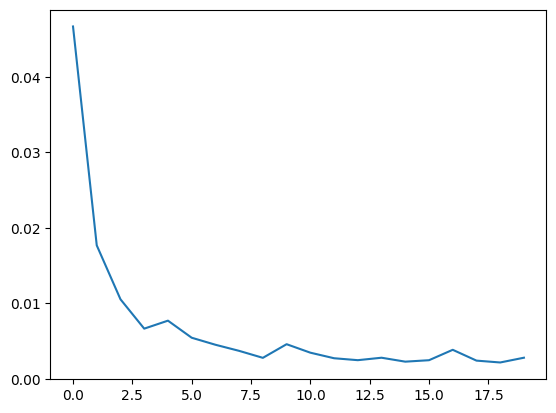

In [ ]:
loss=model.history.history['loss']
plt.plot(range(len(loss)),loss)

In [ ]:
test_pred=[]
first_batch=scaledtraindata[-n_inputs:]
current_batch=first_batch.reshape(1,n_inputs,n_features)
for i in range(len(testdata)):
  current_pred=model.predict(current_batch)[0]
  print(current_pred)
  test_pred.append(current_pred)
  current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 18ms/step
[0.5346941]
1/1 [==============================] - 0s 18ms/step
[0.46933684]
1/1 [==============================] - 0s 19ms/step
[0.68995434]
1/1 [==============================] - 0s 22ms/step
[0.78718555]
1/1 [==============================] - 0s 22ms/step
[0.88366145]
1/1 [==============================] - 0s 23ms/step
[0.8846887]
1/1 [==============================] - 0s 23ms/step
[0.8039005]
1/1 [==============================] - 0s 23ms/step
[0.6610097]
1/1 [==============================] - 0s 26ms/step
[0.5610105]
1/1 [==============================] - 0s 19ms/step
[0.51487786]
1/1 [==============================] - 0s 19ms/step
[0.4518157]
1/1 [==============================] - 0s 19ms/step
[0.4707505]
1/1 [==============================] - 0s 19ms/step
[0.49980605]
1/1 [==============================] - 0s 20ms/step
[0.4745746]
1/1 [==============================] - 0s 23ms/step
[0.62581086]
1/1 [============================

In [ ]:
true_pred=scalar.inverse_transform(test_pred)
print(true_pred)


[[839.17964709]
 [820.94497767]
 [882.49726099]
 [909.62476838]
 [936.54154426]
 [936.82814044]
 [914.288234  ]
 [874.42171437]
 [846.5219239 ]
 [833.65092176]
 [816.05657879]
 [821.33939248]
 [829.44588697]
 [822.4063122 ]
 [864.60123038]
 [900.93620127]
 [926.66601598]
 [935.68323576]
 [924.80877829]
 [890.35677123]
 [861.02566284]
 [844.0555737 ]
 [826.58769125]
 [819.8629083 ]
 [824.22395459]
 [822.26053628]
 [840.99547684]
 [886.43447453]
 [916.855726  ]
 [932.24424791]
 [931.63450348]
 [907.5320043 ]
 [874.52736282]
 [854.06398988]
 [836.72902858]
 [825.19211054]
 [821.68248805]
 [823.47823745]
 [826.53423509]
 [866.79006422]
 [904.93279946]
 [926.22082239]
 [934.12125832]
 [921.3566696 ]
 [890.18565166]
 [864.24705112]
 [846.59431297]
 [831.36969334]
 [822.38330501]
 [823.4852635 ]
 [822.4830333 ]
 [842.50821376]
 [888.62819749]
 [916.95151305]
 [931.91687572]
 [930.31473756]
 [907.2790001 ]
 [876.43668473]
 [856.10590035]
 [839.23785102]
 [827.48058951]
 [822.36821356]
 [823.30

In [ ]:
inverse_testdata=scalar.inverse_transform(scaledtestdata)
print(inverse_testdata)

[[734.]
 [690.]
 [785.]
 [805.]
 [871.]
 [845.]
 [801.]
 [764.]
 [725.]
 [723.]
 [690.]
 [734.]
 [750.]
 [707.]
 [807.]
 [824.]
 [886.]
 [859.]
 [819.]
 [783.]
 [740.]
 [747.]
 [711.]
 [751.]
 [804.]
 [756.]
 [860.]
 [878.]
 [942.]
 [913.]
 [869.]
 [834.]
 [790.]
 [800.]
 [763.]
 [800.]
 [826.]
 [799.]
 [890.]
 [900.]
 [961.]
 [935.]
 [894.]
 [855.]
 [809.]
 [810.]
 [766.]
 [805.]
 [821.]
 [773.]
 [883.]
 [898.]
 [957.]
 [924.]
 [881.]
 [837.]
 [784.]
 [791.]
 [760.]
 [802.]
 [828.]
 [778.]
 [889.]
 [902.]
 [969.]
 [947.]
 [908.]
 [867.]
 [815.]
 [812.]
 [773.]
 [813.]
 [834.]
 [782.]
 [892.]
 [903.]
 [966.]
 [937.]
 [896.]
 [858.]
 [817.]
 [827.]
 [797.]
 [843.]
 [ nan]]


In [ ]:
df=pd.DataFrame({'truevalue':inverse_testdata[:,0],'predvalue':true_pred[:,0]})
print(df)

    truevalue   predvalue
0       734.0  839.179647
1       690.0  820.944978
2       785.0  882.497261
3       805.0  909.624768
4       871.0  936.541544
..        ...         ...
80      817.0  930.244760
81      827.0  908.324293
82      797.0  877.814538
83      843.0  857.463499
84        NaN  840.456459

[85 rows x 2 columns]


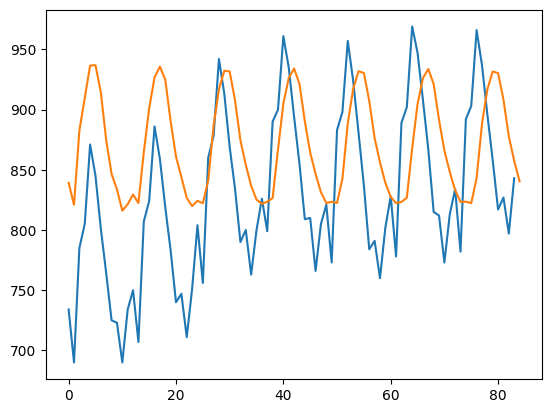

In [ ]:
plt.plot(df['truevalue'])
plt.plot(df['predvalue'])